In [1]:
import pandas as pd
import nltk


In [2]:
df = pd.read_csv(r"C:\Users\acer\Desktop\ds class\nlp\sentiment analysis project amazon\preprocessed_data.csv")
df.head()

,Product Name,Price,Rating,Number of Ratings,Number of Reviews,Review Summary,Review Details
0,"Nokia C32 (Charcoal, 128 GB)","₹7,999",4.0,106,15,Best in the market!,Super 👍 mobile hai
1,"Nokia C32 (Charcoal, 128 GB)","₹7,999",4.0,106,15,Good quality product,I LIKE IT.
2,"Nokia C32 (Charcoal, 128 GB)","₹7,999",4.0,106,15,Worth every penny,Excellent mobile
3,"Nokia C32 (Charcoal, 128 GB)","₹7,999",4.0,106,15,Absolute rubbish!,Phone keeps hanging every now and then and als...
4,"Nokia C32 (Charcoal, 128 GB)","₹7,999",4.0,106,15,Brilliant,Nice 👍


In [3]:
def calculate_weighted_score(row, model):

    #Normalizing ratings
    normalized_rating = row['Rating']/5

    #Calculate sentiment scores for review summary and details
    review_summary_score = model(row['Review Summary'])
    review_details_score = model(row['Review Details'])

    #Review summary sentiment scores
    review_summary_negative_val = review_summary_score['neg']
    review_summary_neutral_val = review_summary_score['neu']
    review_summary_positive_val = review_summary_score['pos']
    review_summary_compound_val = review_summary_score['compound']

    #Review details sentiment scores
    review_details_negative_val = review_details_score['neg']
    review_details_neutral_val = review_details_score['neu']
    review_details_positive_val = review_details_score['pos']
    review_details_compound_val = review_details_score['compound']
    
    # print("Product Name: ", row["Product Name"])
    # print("Normalized Rating: ", normalized_rating)
    # print("Normalized number of reviews: ", normalized_rating)
    # print(row['Review Summary'])
    # print("Summary Review Score: ", review_summary_score)
    # print(row['Review Details'])
    # print("Summary Details Score: ", review_details_score)
    # print("-" *50)
    
    # weights based on importance of each features in final sentiment score calculation
    weights = {"Rating" : 0.2, "Review Summary" : 0.3, "Review Details" : 0.5} #sum of all weights is 1

    #Weighted average score calculations
    weighted_negative_score = (review_summary_negative_val * weights["Review Summary"] + review_details_negative_val * weights["Review Details"])
    weighted_neutral_score = (review_summary_neutral_val * weights["Review Summary"] + review_details_neutral_val * weights["Review Details"])
    weighted_positive_score = (review_summary_positive_val * weights["Review Summary"] + review_details_positive_val * weights["Review Details"])
    
    weighted_compound_score = (normalized_rating * weights["Rating"] +
                      review_summary_compound_val * weights["Review Summary"] +
                      review_details_compound_val * weights["Review Details"])
    
    return weighted_negative_score, weighted_neutral_score, weighted_positive_score, weighted_compound_score

Q.why the sentiment scores are multiplied by their respective weights and then added together. why it is needed to do so 
ANS---→ e.g.

Suppose we have a review with the following sentiment scores:
- Review Summary: Negative = 0.2, Neutral = 0.3, Positive = 0.5
- Review Details: Negative = 0.4, Neutral = 0.3, Positive = 0.3

And we have the following weights:
- Review Summary: 0.3
- Review Details: 0.7

If we simply calculate the sentiment scores AVERAGE, we would get:
- Negative = (0.2 + 0.4) / 2 = 0.3
- Neutral = (0.3 + 0.3) / 2 = 0.3
- Positive = (0.5 + 0.3) / 2 = 0.4

This treats the review summary and review details as equally important, which might not be accurate. In our case, the review details are considered more important defenetely (weight of 0.7).

💎By calculating a weighted average, we give more importance to the important feature (review details) {according to event}:

- Weighted Negative = 0.2 * 0.3 + 0.4 * 0.7 = 0.32
- Weighted Neutral = 0.3 * 0.3 + 0.3 * 0.7 = 0.3
- Weighted Positive = 0.5 * 0.3 + 0.3 * 0.7 = 0.36

As you can see, the weighted scores are different from the simple averages. The weighted negative score is higher and the weighted positive score is lower, reflecting the higher importance of the review details, which had a higher negative score and a lower positive score.

# VADER Sentiment Analysis

In [4]:
from nltk.sentiment import SentimentIntensityAnalyzer # SentimentIntensityAnalyzer- uses VADER methodology for sentiment analysis

In [5]:
#Loading the VADER model
sia = SentimentIntensityAnalyzer()
sia.polarity_scores("The laptop is really good and has a lot of cool and latest features")

{'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'compound': 0.6697}

# <span style="color:purple;"> Compound score is sum of all sentiment scores,& standerd scaling is done to keep it in -1 and 1. where -1 is extremely negative & 1 is extremly positive ,0 is neutral </span> 

In [6]:
print(df['Review Details'][3])
sia.polarity_scores(df['Review Details'][3])


Phone keeps hanging every now and then and also the battery gets discharged very quickly..very worse and disappointed purchase...


{'neg': 0.276, 'neu': 0.724, 'pos': 0.0, 'compound': -0.7564}

In [7]:
#Calculates the VADER score for some 'text'
def calculate_vader_score (text):
    return sia.polarity_scores(text)

In [8]:
#Run the polarity score on the entire dataset and create columns for it
df[['VADER_neg','VADER_neu','VADER_pos','VADER_compound_score']] = df.apply(calculate_weighted_score, args=(calculate_vader_score,), axis = 1,result_type='expand')

In [9]:
df.head()

,Product Name,Price,Rating,Number of Ratings,Number of Reviews,Review Summary,Review Details,VADER_neg,VADER_neu,VADER_pos,VADER_compound_score
0,"Nokia C32 (Charcoal, 128 GB)","₹7,999",4.0,106,15,Best in the market!,Super 👍 mobile hai,0.000,0.2895,0.5105,0.66058
1,"Nokia C32 (Charcoal, 128 GB)","₹7,999",4.0,106,15,Good quality product,I LIKE IT.,0.000,0.2654,0.5346,0.47272
2,"Nokia C32 (Charcoal, 128 GB)","₹7,999",4.0,106,15,Worth every penny,Excellent mobile,0.000,0.2604,0.5396,0.51384
3,"Nokia C32 (Charcoal, 128 GB)","₹7,999",4.0,106,15,Absolute rubbish!,Phone keeps hanging every now and then and als...,0.138,0.6620,0.0000,-0.21820
4,"Nokia C32 (Charcoal, 128 GB)","₹7,999",4.0,106,15,Brilliant,Nice 👍,0.000,0.0000,0.8000,0.54652


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

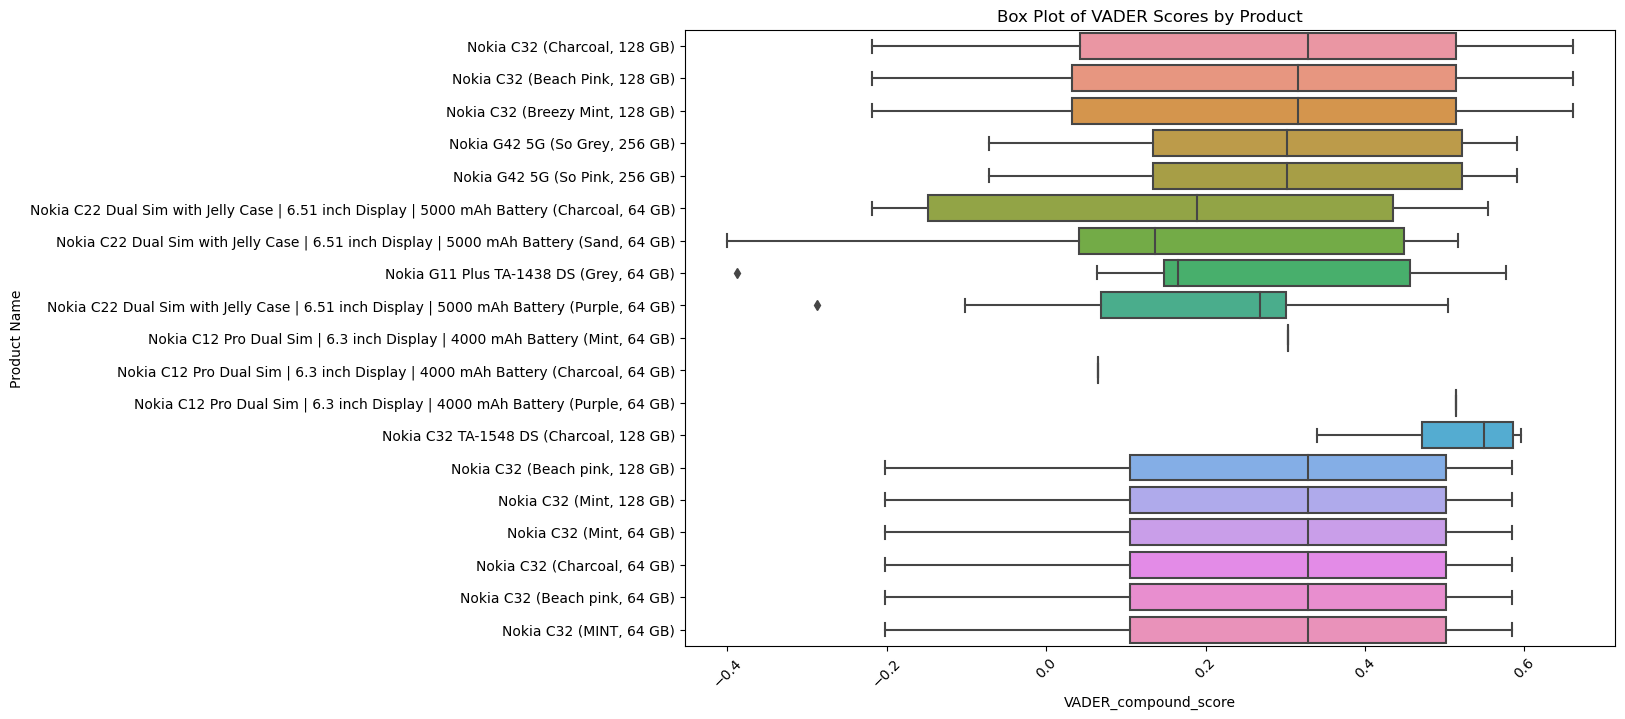

In [11]:
#Box Plot of VADER compound scores
plt.figure(figsize=(12, 8))  
sns.boxplot(x='VADER_compound_score', y='Product Name', data=df)  
plt.title('Box Plot of VADER Scores by Product')
plt.xticks(rotation=45)
plt.show()

# Sentiment Analysis modelling

In [12]:
from transformers import AutoTokenizer #used to convert text into a format that can be used by the model (like numerical value or array)
from transformers import AutoModelForSequenceClassification #AutoModelForSequenceClassification is a class that provides automatic model architecture(version) selection for sequence classification tasks (like sentiment analysis, text classification etc.). You provide the name of a pre-trained model, and it automatically selects the correct model architecture for that pre-trained model.


In [13]:
# from transformers import AutoTokenizer, TFAutoModelForSequenceClassification

# MODEL = "cardiffnlp/twitter-roberta-base-sentiment-latest"
# tokenizer = AutoTokenizer.from_pretrained(MODEL)
# model = TFAutoModelForSequenceClassification.from_pretrained(MODEL)
#400mb from tensorflow framework

In [14]:
# #Loading the RoBERTa model
# MODEL = "cardiffnlp/twitter-roberta-base-sentiment-latest"
# tokenizer = AutoTokenizer.from_pretrained(MODEL)
# model = AutoModelForSequenceClassification.from_pretrained(MODEL)
# #400mb from pytorch framework

In [15]:
#use albert 70mb 18m parameters or distilbert 250mb 66m parameters

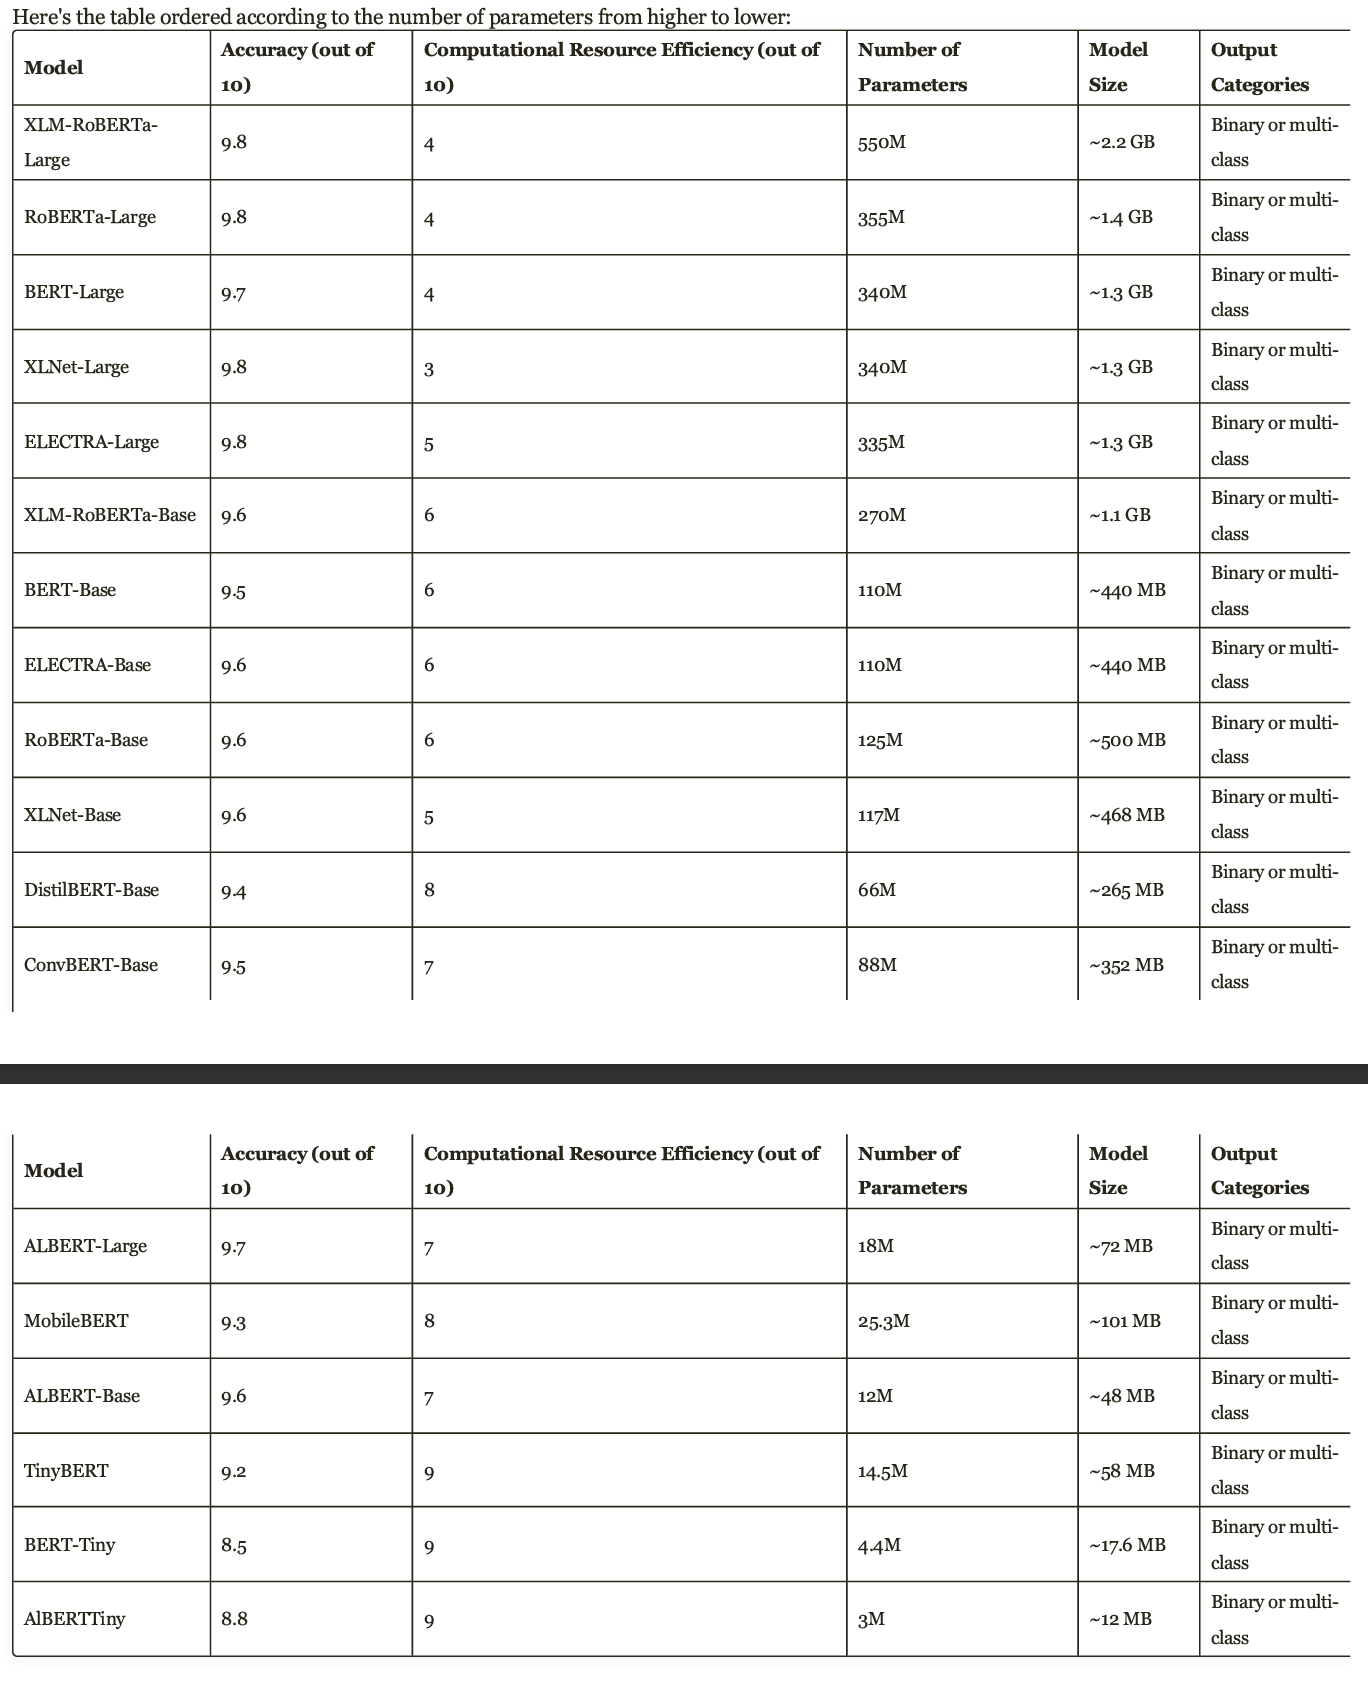

In [16]:
from transformers import AutoTokenizer, TFAlbertForSequenceClassification #using albert model for sentiment analysis

MODEL = "albert-base-v2"  
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = TFAlbertForSequenceClassification.from_pretrained(MODEL, num_labels=3) # specify the number of classes here if want multi-class classification output ,otherwise by default it is 2, means itll give binary output only

All PyTorch model weights were used when initializing TFAlbertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFAlbertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [17]:
print(df['Review Details'][3])
sia.polarity_scores(df['Review Details'][3])

Phone keeps hanging every now and then and also the battery gets discharged very quickly..very worse and disappointed purchase...


{'neg': 0.276, 'neu': 0.724, 'pos': 0.0, 'compound': -0.7564}

In [18]:
from scipy.special import softmax

-The `softmax` function is used in machine learning to convert real numbers into a probability distribution.

-In the context of(NLP) & sentiment analysis, softmax function used to convert the raw output scores from a model into probabilities score. These probabilities score shows the model's confidence in each possible sentiment category (like positive, negative, or neutral sentiment).for a given piece of text.

eg: #Suppose you have these output scores from a model 

<span style="color:green;"> scores = [2.0, 1.0, 0.1] </span>


#You can convert these scores into probabilities using softmax

<span style="color:green;"> probabilities = softmax(scores) </span>

<span style="color:green;"> print(probabilities) </span>

<span style="color:green;"> output:-[0.65900114, 0.24243297, 0.09856589]` </span>
, which sums up to 1.
This means the model is 65.9% confident that the sentiment is the first category, 24.2% confident that it's the second category, and 9.9% confident that it's the third category.

In [19]:
print(df['Review Details'][3])
encoded_text = tokenizer(df['Review Details'][3], return_tensors='tf')             
output = model(encoded_text)                                                     
scores = output[0][0].numpy()                                             
scores = softmax(scores)
print(scores)

Phone keeps hanging every now and then and also the battery gets discharged very quickly..very worse and disappointed purchase...


[0.41101894 0.23905024 0.3499308 ]


In [20]:
encoded_text = tokenizer("The laptop is really good and has a lot of cool and latest features", return_tensors='tf')
output = model(encoded_text)
scores = output[0][0].numpy()
scores = softmax(scores)
print(scores)

[0.39908603 0.23623486 0.3646791 ]


In [25]:
from scipy.special import softmax

def calculate_albert_score(text):
    encoded_text = tokenizer(text, return_tensors='tf')  # Tokenization
    output = model(encoded_text)  # Model input
    scores = output[0][0].numpy()  # Post processing
    scores = softmax(scores)

    negative_score = scores[0]
    neutral_score = scores[1]
    positive_score = scores[2]
    
    # Calculating compound score based on negative, neutral and positive scores
    compound_score = (negative_score * -1) + (neutral_score * 0) + (positive_score * 1)

    scores_dict = {
        "neg" : negative_score,
        "neu" : neutral_score,
        "pos" : positive_score,
        "compound" : compound_score
    }
    return scores_dict

In [26]:
# Run the ALBERT model on the entire dataset and create columns for it
df[['ALBERT_neg', 'ALBERT_neu', 'ALBERT_pos', 'ALBERT_compound_Score']] = df.apply(calculate_weighted_score, args=(calculate_albert_score,), axis = 1, result_type='expand')

In [27]:
df.head()

,Product Name,Price,Rating,Number of Ratings,Number of Reviews,Review Summary,Review Details,VADER_neg,VADER_neu,VADER_pos,VADER_compound_score,ALBERT_neg,ALBERT_neu,ALBERT_pos,ALBERT_compound_Score
0,"Nokia C32 (Charcoal, 128 GB)","₹7,999",4.0,106,15,Best in the market!,Super 👍 mobile hai,0.000,0.2895,0.5105,0.66058,0.351327,0.184616,0.264057,0.072730
1,"Nokia C32 (Charcoal, 128 GB)","₹7,999",4.0,106,15,Good quality product,I LIKE IT.,0.000,0.2654,0.5346,0.47272,0.296201,0.209656,0.294144,0.157943
2,"Nokia C32 (Charcoal, 128 GB)","₹7,999",4.0,106,15,Worth every penny,Excellent mobile,0.000,0.2604,0.5396,0.51384,0.334230,0.192878,0.272892,0.098663
3,"Nokia C32 (Charcoal, 128 GB)","₹7,999",4.0,106,15,Absolute rubbish!,Phone keeps hanging every now and then and als...,0.138,0.6620,0.0000,-0.21820,0.320983,0.191297,0.287720,0.126737
4,"Nokia C32 (Charcoal, 128 GB)","₹7,999",4.0,106,15,Brilliant,Nice 👍,0.000,0.0000,0.8000,0.54652,0.351021,0.195984,0.252995,0.061974


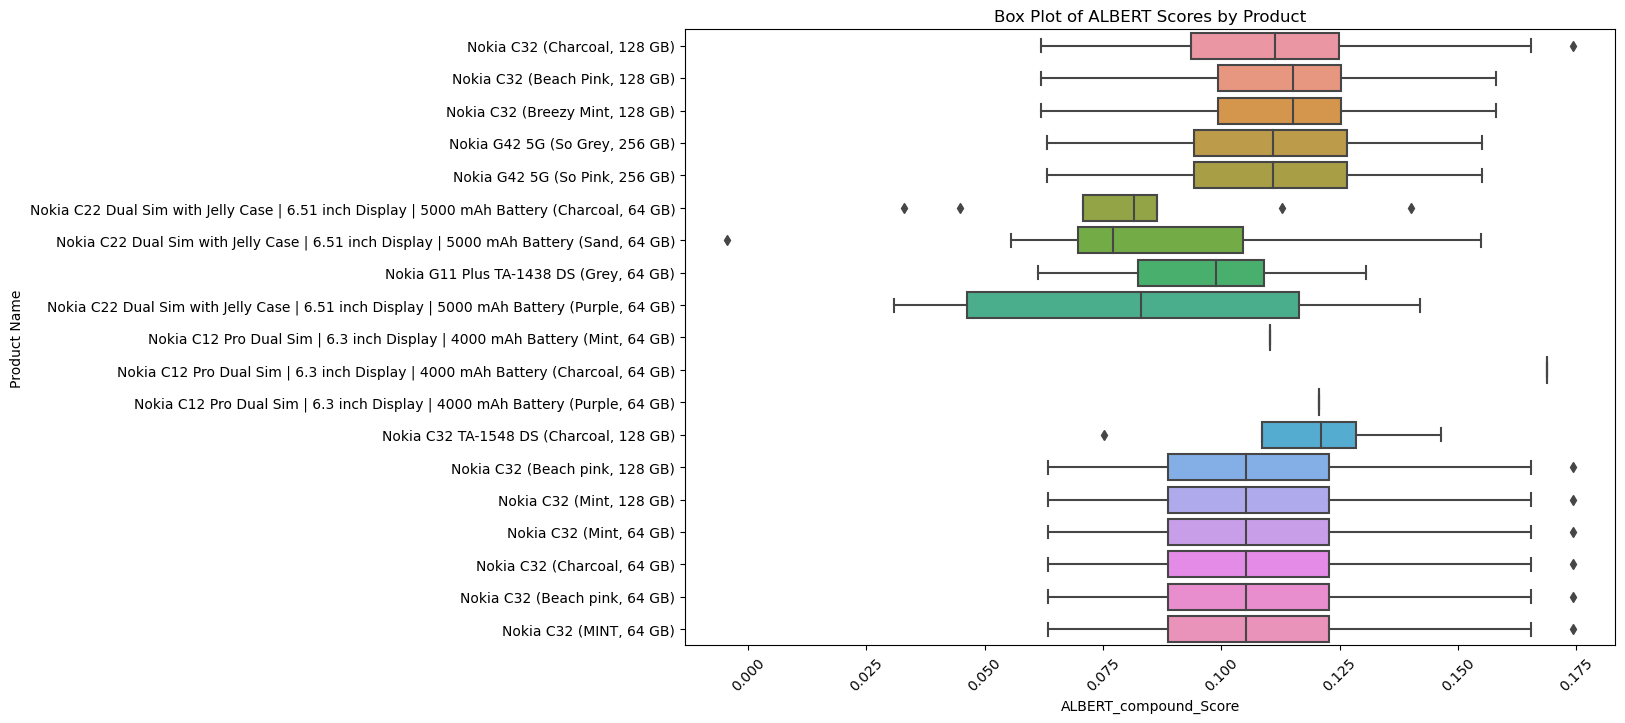

In [29]:
# Box Plot of ALBERT compound scores
plt.figure(figsize=(12, 8))
sns.boxplot(x='ALBERT_compound_Score', y='Product Name', data=df)
plt.title('Box Plot of ALBERT Scores by Product')
plt.xticks(rotation=45)
plt.show()

In [30]:
df.columns

Index(['Product Name', 'Price', 'Rating', 'Number of Ratings',
       'Number of Reviews', 'Review Summary', 'Review Details', 'VADER_neg',
       'VADER_neu', 'VADER_pos', 'VADER_compound_score', 'ALBERT_neg',
       'ALBERT_neu', 'ALBERT_pos', 'ALBERT_compound_Score'],
      dtype='object')

c:\Users\acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


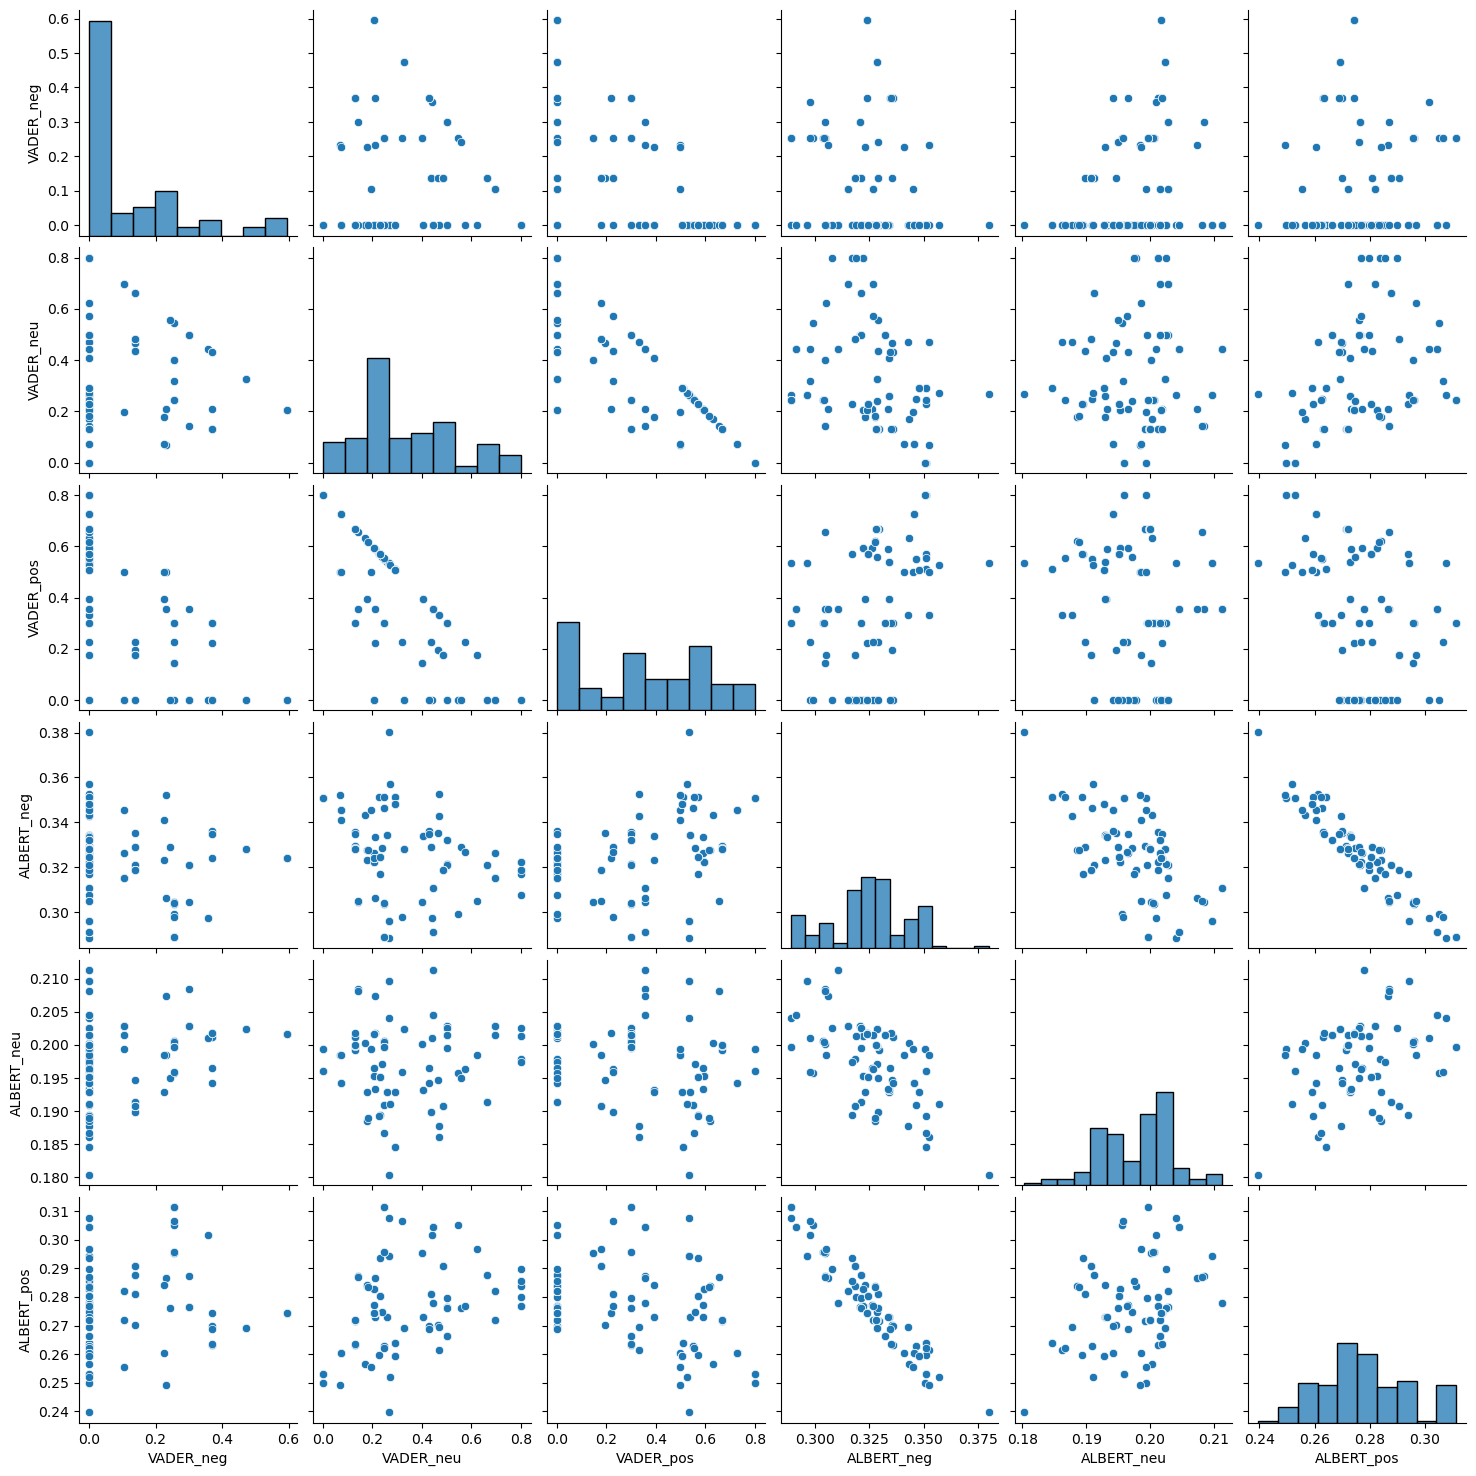

In [31]:
# Correlation analyses on VADER and ALBERT scores
sns.pairplot(data=df,
             vars=['VADER_neg','VADER_neu', 'VADER_pos',
                  'ALBERT_neg','ALBERT_neu', 'ALBERT_pos'])

In [32]:
#agrregating scores by grouping reviews for each product
aggregate_scores = df.groupby('Product Name').agg({
    'VADER_compound_score': 'mean',  # or any other aggregation method
    'ALBERT_compound_Score': 'mean'
})

In [33]:
aggregate_scores

,VADER_compound_score,ALBERT_compound_Score
Product Name,,
"Nokia C12 Pro Dual Sim | 6.3 inch Display | 4000 mAh Battery (Charcoal, 64 GB)",0.064660,0.168810
"Nokia C12 Pro Dual Sim | 6.3 inch Display | 4000 mAh Battery (Mint, 64 GB)",0.303010,0.110197
"Nokia C12 Pro Dual Sim | 6.3 inch Display | 4000 mAh Battery (Purple, 64 GB)",0.513760,0.120601
"Nokia C22 Dual Sim with Jelly Case | 6.51 inch Display | 5000 mAh Battery (Charcoal, 64 GB)",0.179733,0.081235
"Nokia C22 Dual Sim with Jelly Case | 6.51 inch Display | 5000 mAh Battery (Purple, 64 GB)",0.179733,0.083591
"Nokia C22 Dual Sim with Jelly Case | 6.51 inch Display | 5000 mAh Battery (Sand, 64 GB)",0.156317,0.082435
"Nokia C32 (Beach Pink, 128 GB)",0.262912,0.112202
"Nokia C32 (Beach pink, 128 GB)",0.272030,0.110518
"Nokia C32 (Beach pink, 64 GB)",0.272030,0.110518


In [34]:
#Avergae score for each product based on both model results
aggregate_scores['Combined_Score'] = aggregate_scores.mean(axis=1)

In [35]:
aggregate_scores

,VADER_compound_score,ALBERT_compound_Score,Combined_Score
Product Name,,,
"Nokia C12 Pro Dual Sim | 6.3 inch Display | 4000 mAh Battery (Charcoal, 64 GB)",0.064660,0.168810,0.116735
"Nokia C12 Pro Dual Sim | 6.3 inch Display | 4000 mAh Battery (Mint, 64 GB)",0.303010,0.110197,0.206603
"Nokia C12 Pro Dual Sim | 6.3 inch Display | 4000 mAh Battery (Purple, 64 GB)",0.513760,0.120601,0.317180
"Nokia C22 Dual Sim with Jelly Case | 6.51 inch Display | 5000 mAh Battery (Charcoal, 64 GB)",0.179733,0.081235,0.130484
"Nokia C22 Dual Sim with Jelly Case | 6.51 inch Display | 5000 mAh Battery (Purple, 64 GB)",0.179733,0.083591,0.131662
"Nokia C22 Dual Sim with Jelly Case | 6.51 inch Display | 5000 mAh Battery (Sand, 64 GB)",0.156317,0.082435,0.119376
"Nokia C32 (Beach Pink, 128 GB)",0.262912,0.112202,0.187557
"Nokia C32 (Beach pink, 128 GB)",0.272030,0.110518,0.191274
"Nokia C32 (Beach pink, 64 GB)",0.272030,0.110518,0.191274


In [36]:
#Finding the BEST PRODUCT
best_product = aggregate_scores['Combined_Score'].idxmax()
print("Product with the highest combined score:" ,best_product)

Product with the highest combined score: Nokia C12 Pro Dual Sim | 6.3 inch Display | 4000 mAh Battery (Purple, 64 GB)
